# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jet/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")
print(api_key)

None


In [9]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [126]:
Bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    
)
# Print total articles
print(f"Total articles about Bitcoin: {Bitcoin_headlines['totalResults']}")

# Show sample article
Bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 7055


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Andrew Tarantola',
 'title': "Hitting the Books: How Bitcoin is somehow worth more than the paper it's printed on",
 'description': 'Bitcoin and similar blockchain-based cryptos exhibit the same radical divergence from traditional scarcity economics that we first saw when MP3s and Napster cratered physical album sales at the turn of the century. Unlike gold, which derives its value from bo…',
 'url': 'https://www.engadget.com/hitting-the-books-the-future-of-money-eswar-prasad-harvard-university-press-153024975.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-09/5ea7d740-17ff-11ec-9ffd-ff33ac942d83',
 'publishedAt': '2021-09-25T15:30:24Z',
 'content': 'Bitcoin and similar blockchain-based cryptos exhibit the same radical divergence from traditional scarcity economics that we first saw when MP3s and Napster cratered physical album sales at the turn … [+8436 chars]'}

In [127]:
# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    
)
# Show sample article
Ethereum_headlines["articles"][0]

{'source': {'id': None, 'name': 'Blogspot.com'},
 'author': 'noreply@blogger.com (Unknown)',
 'title': 'Nervos launches cross-chain bridge to connect Ethereum and Cardano',
 'description': 'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.Nervos\xa0today announced that the Force Bridge is now live on the mainnet. The Nervos Network is a collection of…',
 'url': 'https://techncruncher.blogspot.com/2021/10/nervos-launches-cross-chain-bridge-to.html',
 'urlToImage': 'https://blogger.googleusercontent.com/img/a/AVvXsEgPPOybYbMwmsXrgektLx2gAB_TxrtYlXuFMKC9_ufbyBE23UZ7meSKtNO9FgKdDh0FZf-ugBepgc9Iooy6XQ5s4NkDthhSo2pPF-X2A3Aa2mXtZ5KSkUA4QwB7tEzJ8y79T4iN0A7XC-Ac_RdFuEhCDUuirVAvxQH4b_LUtvyto6aM_sFaDt5v39HYnQ=w1200-h630-p-k-no-nu',
 'publishedAt': '2021-10-16T18:50:00Z',
 'content': 'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other pub

In [130]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
Bitcoin_df = Bitcoin_df[cols]
Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.0000,0.000,0.000,1.000,Bitcoin and similar blockchain-based cryptos e...
1,0.3400,0.076,0.000,0.924,"<ul><li>Bitcoin, in terms of market value, ros..."
2,-0.2411,0.000,0.116,0.884,JPMorgan CEO Jamie Dimon is still not a Bitcoi...
3,0.4939,0.219,0.000,0.781,How high are the chances of Bitcoin sustaining...
4,0.1901,0.091,0.043,0.866,Elon Musk has performed a sudden U-turn on bit...


In [129]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.0000,0.000,0.0,1.000,A new cross-chain bridge is currently connecte...
1,0.0000,0.000,0.0,1.000,Mark Cuban has some advice for people who are ...
2,0.4215,0.101,0.0,0.899,"image source, foundation.app/@SideEyeingChloe\..."
3,0.0000,0.000,0.0,1.000,"An immersive art installation, which will be c..."
4,0.0000,0.000,0.0,1.000,Coinbase NFT\r\nRobert Nickelsberg/Getty Image...


In [17]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.00000,20.000000
mean,0.170340,0.06285,0.01555,0.921650
std,0.296565,0.06882,0.03439,0.067709
min,-0.440400,0.00000,0.00000,0.781000
25%,0.000000,0.00000,0.00000,0.882750
50%,0.107950,0.04900,0.00000,0.916500
75%,0.369700,0.10000,0.00000,1.000000
max,0.726900,0.21900,0.11600,1.000000


In [18]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.175785,0.037750,0.002400,0.959850
std,0.286527,0.064901,0.010733,0.069816
min,0.000000,0.000000,0.000000,0.792000
25%,0.000000,0.000000,0.000000,0.925000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.435300,0.075000,0.000000,1.000000
max,0.822500,0.208000,0.048000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: bitcoin has the highesr mean positive score 62%

Q: Which coin had the highest compound score?

A: bitcoin has the highest compound score 

Q. Which coin had the highest positive score?

A: bitcoin has the hightest positive score 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [70]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /Users/jet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [108]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    text = word_tokenize(text)
    
    # Convert the words to lowercase
    text = [word.lower() for word in text]
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    text = [regex.sub('', word) for word in text]
    
    # Remove the stop words    
    sw = set(stopwords.words('english') + addl_stopwords)

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [word for word in text if word not in sw]
    return text

In [131]:
# Create a new tokens column for Bitcoin
Bitcoin_df["tokens"] = Bitcoin_df.Text.apply(tokenizer)
Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.0000,0.000,0.000,1.000,Bitcoin and similar blockchain-based cryptos e...,"[similar, blockchainbased, cryptos, exhibit, r..."
1,0.3400,0.076,0.000,0.924,"<ul><li>Bitcoin, in terms of market value, ros...","[ul, li, term, market, value, rose, li, li, pa..."
2,-0.2411,0.000,0.116,0.884,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,"[jpmorgan, ceo, jamie, dimon, still, fan, desp..."
3,0.4939,0.219,0.000,0.781,How high are the chances of Bitcoin sustaining...,"[high, chance, sustaining, gain, pushing, altc..."
4,0.1901,0.091,0.043,0.866,Elon Musk has performed a sudden U-turn on bit...,"[elon, musk, ha, performed, sudden, uturn, con..."


In [99]:
# Create a new tokens column for Ethereum
Ethereum_df["tokens"] = Ethereum_df.Text.apply(tokenizer)
Ethereum_df.head()


,Compound,Positive,Negative,Neutral,Text,tokens
0,0.0000,0.000,0.0,1.000,A new cross-chain bridge is currently connecte...,"[new, crosschain, bridge, currently, connected..."
1,0.0000,0.000,0.0,1.000,Mark Cuban has some advice for people who are ...,"[mark, cuban, ha, advice, people, new, investi..."
2,0.4215,0.101,0.0,0.899,"image source, foundation.app/@SideEyeingChloe\...","[image, source, foundationapp, sideeyeingchloe..."
3,0.0000,0.000,0.0,1.000,"An immersive art installation, which will be c...","[immersive, art, installation, converted, nfts..."
4,0.0000,0.000,0.0,1.000,Coinbase NFT\r\nRobert Nickelsberg/Getty Image...,"[coinbase, nft, robert, nickelsberggetty, imag..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [55]:
from collections import Counter
from nltk import ngrams

In [132]:
# Generate the Bitcoin N-grams where N=2
bitcoin_p = tokenizer(Bitcoin_df.Text.str.cat())
bitcoin_p

['similar',
 'blockchainbased',
 'cryptos',
 'exhibit',
 'radical',
 'divergence',
 'traditional',
 'scarcity',
 'economics',
 'first',
 'saw',
 'mp',
 'napster',
 'cratered',
 'physical',
 'album',
 'sale',
 'turn',
 'char',
 'ul',
 'li',
 'term',
 'market',
 'value',
 'rose',
 'li',
 'li',
 'passed',
 'mark',
 'first',
 'time',
 'four',
 'week',
 'tuesday',
 'li',
 'li',
 'fell',
 'early',
 'september',
 'li',
 'char',
 'jpmorgan',
 'ceo',
 'jamie',
 'dimon',
 'still',
 'fan',
 'despite',
 'rapid',
 'price',
 'appreciationfrom',
 'utoday',
 'iftttiyinr',
 'ifttteavjhow',
 'high',
 'chance',
 'sustaining',
 'gain',
 'pushing',
 'altcoins',
 'higher',
 'utoday',
 'iftttbkdpx',
 'ifttteavjelon',
 'musk',
 'ha',
 'performed',
 'sudden',
 'uturn',
 'concern',
 'energy',
 'usage',
 'say',
 'electric',
 'car',
 'firm',
 'tesla',
 'longer',
 'accept',
 'cryptocurrency',
 'payment',
 'decisi',
 'char',
 'specifically',
 'someone',
 'make',
 'massive',
 'purchase',
 'billion',
 'worth',
 'wedn

In [102]:
# Generate the Ethereum N-grams where N=2
ethereum_p= tokenizer(Ethereum_df.Text.str.cat())
ethereum_p

['new',
 'crosschain',
 'bridge',
 'currently',
 'connected',
 'crosschain',
 'bridge',
 'cardano',
 'public',
 'chain',
 'come',
 'future',
 'nervos',
 'today',
 'announced',
 'force',
 'bridge',
 'char',
 'mark',
 'cuban',
 'ha',
 'advice',
 'people',
 'new',
 'investing',
 'cryptocurrency',
 'investment',
 'think',
 'ha',
 'upside',
 'told',
 'cnbc',
 'make',
 'wednesday',
 'added',
 'better',
 'char',
 'image',
 'source',
 'foundationapp',
 'sideeyeingchloe',
 'image',
 'captionchloe',
 'clem',
 'disapproving',
 'look',
 'ha',
 'become',
 'internet',
 'sensation',
 'image',
 'popular',
 'internet',
 'meme',
 'featuring',
 'twoyearold',
 'girl',
 'ha',
 'char',
 'immersive',
 'art',
 'installation',
 'converted',
 'nfts',
 'hong',
 'kong',
 'september',
 'reuterstyrone',
 'siufile',
 'photo',
 'ftxus',
 'affiliate',
 'cryptocurrency',
 'exchange',
 'ftx',
 'launching',
 'char',
 'coinbase',
 'nft',
 'robert',
 'nickelsberggetty',
 'image',
 'coinbase',
 'global',
 'joining',
 'nft',

In [103]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [133]:
# Use token_count to get the top 10 words for Bitcoin
N=2
bigram_counts_B = Counter(ngrams(bitcoin_p, N))
print(dict(bigram_counts_B))


{('similar', 'blockchainbased'): 1, ('blockchainbased', 'cryptos'): 1, ('cryptos', 'exhibit'): 1, ('exhibit', 'radical'): 1, ('radical', 'divergence'): 1, ('divergence', 'traditional'): 1, ('traditional', 'scarcity'): 1, ('scarcity', 'economics'): 1, ('economics', 'first'): 1, ('first', 'saw'): 1, ('saw', 'mp'): 1, ('mp', 'napster'): 1, ('napster', 'cratered'): 1, ('cratered', 'physical'): 1, ('physical', 'album'): 1, ('album', 'sale'): 1, ('sale', 'turn'): 1, ('turn', 'char'): 1, ('char', 'ul'): 1, ('ul', 'li'): 1, ('li', 'term'): 1, ('term', 'market'): 1, ('market', 'value'): 1, ('value', 'rose'): 1, ('rose', 'li'): 1, ('li', 'li'): 2, ('li', 'passed'): 1, ('passed', 'mark'): 1, ('mark', 'first'): 1, ('first', 'time'): 1, ('time', 'four'): 1, ('four', 'week'): 1, ('week', 'tuesday'): 1, ('tuesday', 'li'): 1, ('li', 'fell'): 1, ('fell', 'early'): 1, ('early', 'september'): 1, ('september', 'li'): 1, ('li', 'char'): 1, ('char', 'jpmorgan'): 1, ('jpmorgan', 'ceo'): 1, ('ceo', 'jamie'): 

In [104]:
# Use token_count to get the top 10 words for Ethereum
N= 2
bigram_counts_E = Counter(ngrams(ethereum_p, N))
print(dict(bigram_counts_E))

{('new', 'crosschain'): 1, ('crosschain', 'bridge'): 2, ('bridge', 'currently'): 1, ('currently', 'connected'): 1, ('connected', 'crosschain'): 1, ('bridge', 'cardano'): 1, ('cardano', 'public'): 1, ('public', 'chain'): 1, ('chain', 'come'): 1, ('come', 'future'): 1, ('future', 'nervos'): 1, ('nervos', 'today'): 1, ('today', 'announced'): 1, ('announced', 'force'): 1, ('force', 'bridge'): 1, ('bridge', 'char'): 1, ('char', 'mark'): 1, ('mark', 'cuban'): 1, ('cuban', 'ha'): 1, ('ha', 'advice'): 1, ('advice', 'people'): 1, ('people', 'new'): 1, ('new', 'investing'): 1, ('investing', 'cryptocurrency'): 1, ('cryptocurrency', 'investment'): 1, ('investment', 'think'): 1, ('think', 'ha'): 1, ('ha', 'upside'): 1, ('upside', 'told'): 1, ('told', 'cnbc'): 1, ('cnbc', 'make'): 1, ('make', 'wednesday'): 1, ('wednesday', 'added'): 1, ('added', 'better'): 1, ('better', 'char'): 1, ('char', 'image'): 1, ('image', 'source'): 1, ('source', 'foundationapp'): 1, ('foundationapp', 'sideeyeingchloe'): 1, 

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [109]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

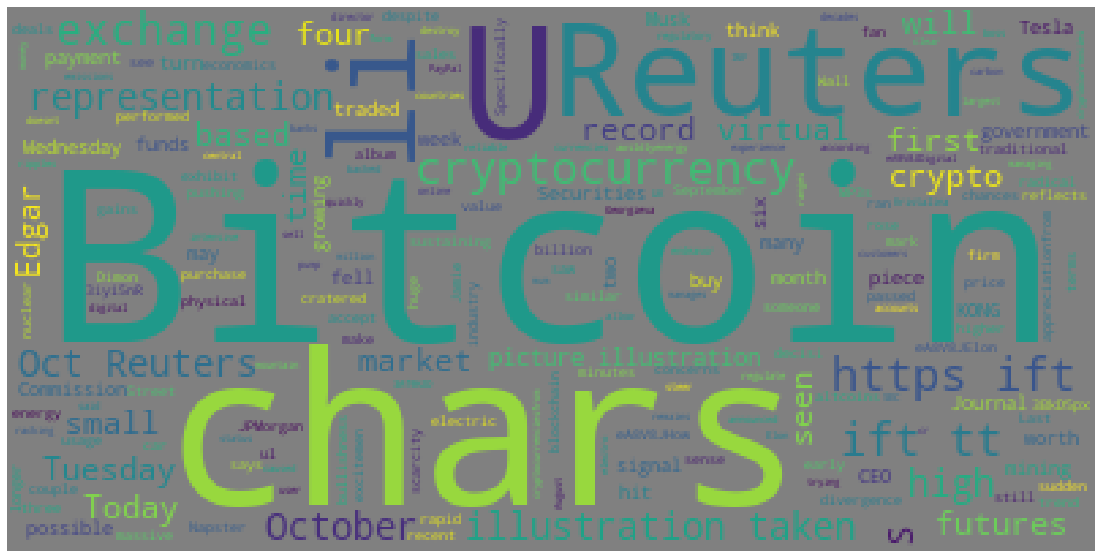

In [134]:
# Generate the Bitcoin word cloud
cloud1 = WordCloud(background_color='grey').generate(Bitcoin_df.Text.str.cat())
cloud1
plt.axis("off")
plt.imshow(cloud1)


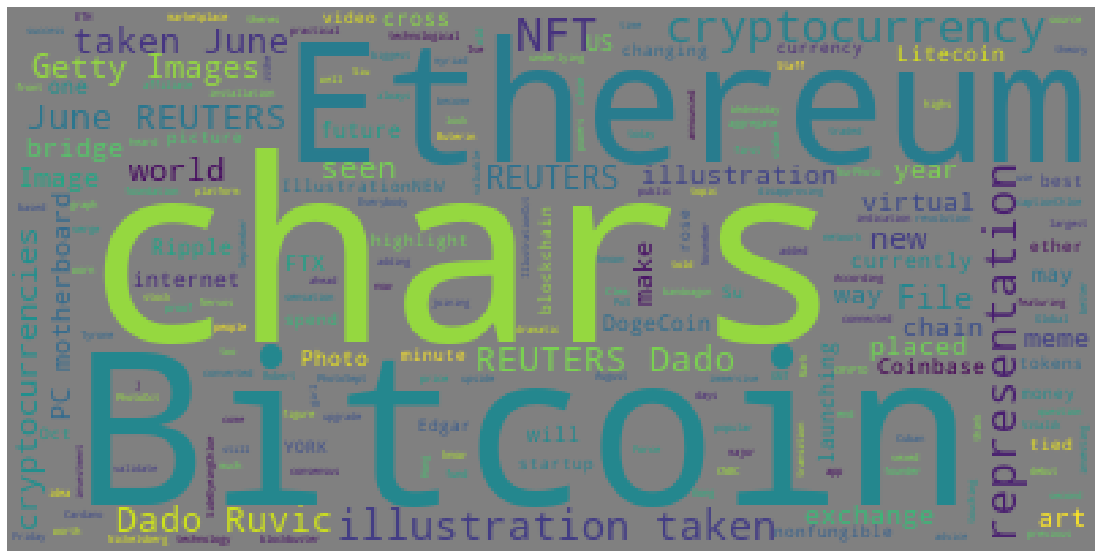

In [113]:
# Generate the Ethereum word cloud
cloud2 = WordCloud(background_color='grey').generate(Ethereum_df.Text.str.cat())
cloud2
plt.axis("off")
plt.imshow(cloud2)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [114]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [115]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [135]:
# Concatenate all of the Bitcoin text together
all_concat_bitcoin = Bitcoin_df.Text.str.cat()
all_concat_bitcoin

'Bitcoin and similar blockchain-based cryptos exhibit the same radical divergence from traditional scarcity economics that we first saw when MP3s and Napster cratered physical album sales at the turn … [+8436 chars]<ul><li>Bitcoin, in terms of market value, rose 4.6% to $53,859.6.</li><li>It passed $50,000 mark for first time in four weeks on Tuesday.\xa0</li><li>Bitcoin fell below $50,000 in early September.</li>… [+821 chars]JPMorgan CEO Jamie Dimon is still not a Bitcoin fan despite rapid price appreciationfrom U.Today https://ift.tt/3iyi5nR https://ift.tt/eA8V8JHow high are the chances of Bitcoin sustaining its gains and pushing altcoins higher?from U.Today https://ift.tt/3BkD5px https://ift.tt/eA8V8JElon Musk has performed a sudden U-turn on bitcoin over concerns about its energy usage, and says his electric car firm Tesla will no longer accept the cryptocurrency as payment – but will his decisi… [+3069 chars]Specifically, why did someone make a massive purchase of $1.6 billion wo

In [139]:
# Run the NER processor on all of the text
# bitcoin_doc = nlp(all_concat_bitcoin)
bitcoin_doc = nlp(all_concat_bitcoin)
bitcoin_doc

# Add a title to the document
bitcoin_doc.user_data["Title"] = "Bitcoin NER"

In [140]:

# Render the visualization
displacy.render(bitcoin_doc, style = 'ent')

In [141]:
# List all Entities
for i in bitcoin_doc.ents:
    print(i.text, i.label_)

Bitcoin GPE
first ORDINAL
MP3s ORG
Napster ORG
Bitcoin GPE
4.6% PERCENT
$50,000 mark MONEY
first ORDINAL
four weeks DATE
Tuesday DATE
Bitcoin GPE
50,000 MONEY
Jamie Dimon PERSON
Bitcoin GPE
U.Today DATE
Bitcoin GPE
U.Today DATE
Musk PERSON
Tesla ORG
$1.6 billion MONEY
bitcoin GPE
Wednesday DATE
a couple of minutes TIME
chars]Last week DATE
the Wall Street Journal ORG
three CARDINAL
Journal ORG
two decades DATE
403 million CARDINAL
23 August DATE
UK GPE
four CARDINAL
SEC ORG
two CARDINAL
U.Today DATE
IMF ORG
Kristalina Georgieva PERSON
Elon Musk ORG
Tuesday DATE
U.S. GPE
Canada GPE
Bitcoin GPE
Alberta GPE
Bitcoin GPE
June 29, 2021 DATE
REUTERS/ ORG
Dado Ruvic PERSON
Oct 21 DATE
Reuters ORG
Bitcoin GPE
Bitcoin GPE
October 19, 2021 DATE
REUTERS/Edgar SuLONDON ORG
Oct 20 DATE
Reuters ORG
Bitcoin GPE
Exchange Commission ORG
REUTERS/ ORG
Andrew Kelly PERSON
The US Securities and Exchange Commission ORG
as many as four CARDINAL
October DATE
Bitcoin GPE
October 18, 2021 DATE
Oct 19 DATE
Reuter

---

### Ethereum NER

In [117]:
# Concatenate all of the Ethereum text together
all_concat_ethereum = Ethereum_df.Text.str.cat()
all_concat_ethereum

"A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.\r\nNervos\xa0today announced that the Force Bridge is … [+3114 chars]Mark Cuban has some advice for people who are new to investing in cryptocurrency.\r\nAs an investment, I think ethereum has the most upside, he told CNBC Make It Wednesday. Bitcoin, he added, is better… [+1139 chars]image source, foundation.app/@SideEyeingChloe\r\nimage captionChloe Clem's disapproving look has become an internet sensation\r\nAn image of a popular internet meme, featuring a two-year-old girl, has be… [+2490 chars]An immersive art installation, which will be converted into NFTs in Hong Kong, September 30, 2021.\r\nREUTERS/Tyrone Siu/File Photo\r\nFTX.US, an affiliate of cryptocurrency exchange FTX, is launching an… [+2138 chars]Coinbase NFT\r\nRobert Nickelsberg/Getty Images\r\nCoinbase Global is joining the NFT bandwagon by launching its own marketplace

In [122]:
# Run the NER processor on all of the text
ethereum_doc = nlp(all_concat_ethereum)
ethereum_doc
# Add a title to the document
ethereum_doc.user_data["Title"] = "Ethereum NER"


In [120]:
# Render the visualization
displacy.render(ethereum_doc, style = 'ent')

In [121]:
# List all Entities
for i in ethereum_doc.ents:
    print(i.text, i.label_)

Nervos ORG
today DATE
the Force Bridge FAC
Cuban NORP
CNBC ORG
Wednesday DATE
Bitcoin GPE
Clem GPE
two-year-old DATE
Hong Kong GPE
September 30, 2021 DATE
REUTERS/ ORG
NFT ORG
Robert Nickelsberg PERSON
NFT ORG
the end of the year DATE
US GPE
NurPhoto / ORG
first ORDINAL
Bitcoin GPE
DogeCoin GPE
Ripple PERSON
Litecoin PERSON
June 29, 2021 DATE
REUTERS/ ORG
Dado Ruvic PERSON
YORK PERSON
Oct PERSON
second ORDINAL
Reuters ORG
Oct 1 DATE
Reuters ORG
Bitcoin GPE
9.46% PERCENT
47,980.97 MONEY
20:12 TIME
Friday DATE
4,146.54 MONEY
Bitcoin GPE
Bitcoin GPE
June 14, 2021 DATE
Edgar Su PERSON
Reuters ORG
7.11% PERCENT
55,162.92 MONEY
20 CARDINAL
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
5 CARDINAL
Bitcoin GPE
August 6, 2021 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
5.23% PERCENT
43,716.97 MONEY
22 CARDINAL
Getty Images PERSON
the minute TIME
Vitalik Buterin PERSON
Ethereum ORG
ETH ORG
One year from now DATE
PoS ORG
these days DATE
Getty Images PERSON
the minute TIME
Bitcoin GPE
D

---